<a href="https://colab.research.google.com/github/svetlana-voskr/Neural-ACT-masses/blob/lana/neural%20networks/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from tqdm.notebook import tqdm
from IPython.display import clear_output

In [16]:
import torch
from torch.nn.functional import conv2d
import torch.nn as nn
import torch.nn.functional as F
import torchvision

Скачаем и подготовим данные для классификации.

In [17]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                            torchvision.transforms.Normalize((0.1307,), (0.3081,))])

In [18]:
# используем готовый класс от торча для загрузки данных для тренировки
mnist_train = torchvision.datasets.MNIST('./mnist/', train=True, download=True, transform=transform)

# используем готовый класс от торча для загрузки данных для валидации
mnist_val = torchvision.datasets.MNIST('./mnist/', train=False, download=True, transform=transform)

In [19]:
# так как это уже унаследованный от Dataset класс, его можно сразу пихать в даталоадер
train_dataloader = torch.utils.data.DataLoader(mnist_train, batch_size=64, shuffle=True)

# так как это уже унаследованный от Dataset класс, его можно сразу пихать в даталоадер
val_dataloader = torch.utils.data.DataLoader(mnist_val, batch_size=64, shuffle=True)

Посмотрим на изображения

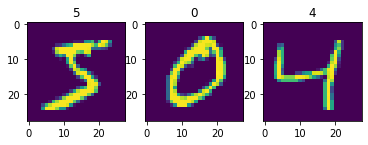

In [20]:
for i in [0, 1, 2]:
    plt.subplot(1, 3, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

In [21]:
model = nn.Sequential(
    nn.Flatten(), # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(784, 128), # входной слой размером 784 нейронов с выходом в 128 нейронов
    nn.ReLU(), # функция активации релу
    nn.Linear(128, 10), # функция активации релу
    nn.Softmax(dim=-1) # софтмакс для получения вероятностного распределения над метками класса
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # создаем оптимизатор и передаем туда параметры модели

In [34]:
def train(model, optimizer, n=11):
   # n epoch
    epoch = 0
    for epoch in range(0, n): # всего у нас будет 10 эпох (10 раз подряд пройдемся по всем батчам из трейна)
        for x_train, y_train in tqdm(train_dataloader): # берем батч из трейн лоадера
            y_pred = model(x_train) # делаем предсказания
            loss = nn.CrossEntropyLoss()(y_pred, y_train) # считаем лосс
            loss.backward() # считаем градиенты обратным проходом
            optimizer.step() # обновляем параметры сети
            optimizer.zero_grad() # обнуляем посчитанные градиенты параметров

        # валидация
        mean_val_loss = [] # сюда будем складывать средний лосс по батчам
        val_accuracy = []
        with torch.no_grad(): # мы считаем качество, поэтому мы запрещаем фреймворку считать градиенты по параметрам
            for x_val, y_val in tqdm(val_dataloader): # берем батч из вал лоадера
                y_pred = model(x_val) # делаем предсказания
                loss = nn.CrossEntropyLoss()(y_pred, y_val) # считаем лосс
                mean_val_loss.append(loss.numpy()) # добавляем в массив 
                val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())
        print('Epoch: {epoch}, loss: {loss}, accuracy: {accuracy}'.format(
                epoch=epoch, loss=np.mean(mean_val_loss), accuracy=np.mean(val_accuracy)
        )) # выводим статистику

In [12]:
train(model, optimizer)

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 0, loss: 1.7528868913650513, accuracy: 0.7997


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 1, loss: 1.6678454875946045, accuracy: 0.8277


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 2, loss: 1.6469866037368774, accuracy: 0.8353


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 3, loss: 1.6373485326766968, accuracy: 0.84


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 4, loss: 1.6033881902694702, accuracy: 0.885


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 5, loss: 1.5755316019058228, accuracy: 0.9087


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 6, loss: 1.5654605627059937, accuracy: 0.9131


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 7, loss: 1.559239149093628, accuracy: 0.9167


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 8, loss: 1.5557076930999756, accuracy: 0.92


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 9, loss: 1.5528243780136108, accuracy: 0.9222


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 10, loss: 1.5490339994430542, accuracy: 0.9249


## Сonvnet

Добавим сверточный слой

In [13]:
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5), # добавим сверточный слой с 10 ядрами
    nn.ReLU(),
    nn.MaxPool2d(4), # уменьшим картинку в 4 раза
    nn.Flatten(), # превращаем картинку 6х6х10 в вектор размером 360
    nn.Linear(6*6*10, 128), # входной слой размером 360 нейронов с выходом в 128 нейронов
    nn.ReLU(), # функция активации релу
    nn.Linear(128, 10), # функция активации релу
    nn.Softmax(dim=-1) # софтмакс для получения вероятностного распределения над метками класса
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # создаем оптимизатор и передаем туда параметры модели

In [14]:
train(model, optimizer)

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 0, loss: 1.8282520771026611, accuracy: 0.703


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 1, loss: 1.6586074829101562, accuracy: 0.8311


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 2, loss: 1.6287751197814941, accuracy: 0.847


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 3, loss: 1.6153429746627808, accuracy: 0.8548


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 4, loss: 1.6073118448257446, accuracy: 0.8598


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 5, loss: 1.601983904838562, accuracy: 0.8644


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 6, loss: 1.5978670120239258, accuracy: 0.8678


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 7, loss: 1.5960298776626587, accuracy: 0.8684


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 8, loss: 1.5920486450195312, accuracy: 0.8727


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 9, loss: 1.5901998281478882, accuracy: 0.8749


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 10, loss: 1.5872596502304077, accuracy: 0.8767


In [35]:
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5), # добавим сверточный слой с 10 ядрами
    nn.ReLU(),
    nn.MaxPool2d(2), # уменьшим картинку в 2 раза
    nn.Conv2d(in_channels=10, out_channels=20, kernel_size=5), # добавим сверточный слой с 20 ядрами
    nn.ReLU(),
    nn.MaxPool2d(2), # уменьшим картинку в 2 раза
    nn.Flatten(), # превращаем картинку 4х4х20 в вектор размером 320
    nn.Linear(4*4*20, 128), # входной слой размером 320 нейронов с выходом в 128 нейронов
    nn.ReLU(), # функция активации релу
    nn.Linear(128, 10), # функция активации релу
    nn.Softmax(dim=-1) # софтмакс для получения вероятностного распределения над метками класса
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # создаем оптимизатор и передаем туда параметры модели

In [40]:
import time
start_time = time.time()

train(model, optimizer, 25)
print('Execution time:', '{:5.2f}'.format(time.time() - start_time), 'seconds')

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 0, loss: 1.4847482442855835, accuracy: 0.9781


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 1, loss: 1.479616403579712, accuracy: 0.9831


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 2, loss: 1.4790878295898438, accuracy: 0.984


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 3, loss: 1.4793461561203003, accuracy: 0.9832


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 4, loss: 1.4796802997589111, accuracy: 0.9831


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 5, loss: 1.4784454107284546, accuracy: 0.984


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 6, loss: 1.4779021739959717, accuracy: 0.9852


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 7, loss: 1.481203317642212, accuracy: 0.9803


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 8, loss: 1.4784921407699585, accuracy: 0.9839


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 9, loss: 1.4767957925796509, accuracy: 0.9858


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 10, loss: 1.476467490196228, accuracy: 0.9859


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 11, loss: 1.478182315826416, accuracy: 0.9838


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 12, loss: 1.4772801399230957, accuracy: 0.9852


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 13, loss: 1.476855993270874, accuracy: 0.9854


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 14, loss: 1.4760901927947998, accuracy: 0.9863


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 15, loss: 1.4779056310653687, accuracy: 0.9846


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 16, loss: 1.475528359413147, accuracy: 0.987


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 17, loss: 1.4785401821136475, accuracy: 0.9843


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 18, loss: 1.4765455722808838, accuracy: 0.9859


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 19, loss: 1.4761993885040283, accuracy: 0.9868


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 20, loss: 1.4768738746643066, accuracy: 0.9851


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 21, loss: 1.4753001928329468, accuracy: 0.9869


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 22, loss: 1.4761486053466797, accuracy: 0.9863


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 23, loss: 1.474432349205017, accuracy: 0.9883


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 24, loss: 1.4757311344146729, accuracy: 0.9864
Execution time: 831.73 seconds


## Visual **Transformer**

In [23]:
class ViT(nn.Module):
    def __init__(self, *, image_size, patch_size, num_classes, dim, depth, heads, mlp_dim, channels=3):
        super().__init__()
        assert image_size % patch_size == 0, 'image dimensions must be divisible by the patch size'
        num_patches = (image_size // patch_size) ** 2
        patch_dim = channels * patch_size ** 2

        self.patch_size = patch_size

        self.pos_embedding = nn.Parameter(torch.randn(1, num_patches + 1, dim))
        self.patch_to_embedding = nn.Linear(patch_dim, dim)
        self.cls_token = nn.Parameter(torch.randn(1, 1, dim))
        self.transformer = Transformer(dim, depth, heads, mlp_dim)

        self.to_cls_token = nn.Identity()

        self.mlp_head = nn.Sequential(
            nn.Linear(dim, mlp_dim),
            nn.GELU(),
            nn.Linear(mlp_dim, num_classes)
        )

    def forward(self, img, mask=None):
        p = self.patch_size

        x = rearrange(img, 'b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1=p, p2=p)
        x = self.patch_to_embedding(x)

        cls_tokens = self.cls_token.expand(img.shape[0], -1, -1)
        x = torch.cat((cls_tokens, x), dim=1)
        x += self.pos_embedding
        x = self.transformer(x, mask)

        x = self.to_cls_token(x[:, 0])
        return self.mlp_head(x)

In [24]:
def train_epoch(model, optimizer, data_loader, loss_history):
    total_samples = len(data_loader.dataset)
    model.train()

    for i, (data, target) in enumerate(data_loader):
        optimizer.zero_grad()
        output = F.log_softmax(model(data), dim=1)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()

        if i % 100 == 0:
            print('[' +  '{:5}'.format(i * len(data)) + '/' + '{:5}'.format(total_samples) +
                  ' (' + '{:3.0f}'.format(100 * i / len(data_loader)) + '%)]  Loss: ' +
                  '{:6.4f}'.format(loss.item()))
            loss_history.append(loss.item())

In [25]:
def evaluate(model, data_loader, loss_history):
    model.eval()
    
    total_samples = len(data_loader.dataset)
    correct_samples = 0
    total_loss = 0

    with torch.no_grad():
        for data, target in data_loader:
            output = F.log_softmax(model(data), dim=1)
            loss = F.nll_loss(output, target, reduction='sum')
            _, pred = torch.max(output, dim=1)
            
            total_loss += loss.item()
            correct_samples += pred.eq(target).sum()

    avg_loss = total_loss / total_samples
    loss_history.append(avg_loss)
    print('\nAverage test loss: ' + '{:.4f}'.format(avg_loss) +
          '  Accuracy:' + '{:5}'.format(correct_samples) + '/' +
          '{:5}'.format(total_samples) + ' (' +
          '{:4.2f}'.format(100.0 * correct_samples / total_samples) + '%)\n')

In [29]:
!pip install vit-pytorch

     |████████████████████████████████| 50 kB 3.7 MB/s 


In [33]:
import time
import torch
from vit_pytorch import ViT

N_EPOCHS = 25

start_time = time.time()
model = ViT(image_size=28, patch_size=7, num_classes=10, channels=1,
            dim=64, depth=6, heads=8, mlp_dim=128)
optimizer = torch.optim.Adam(model.parameters(), lr=0.003)

train_loss_history, test_loss_history = [], []
for epoch in range(1, N_EPOCHS + 1):
    print('Epoch:', epoch)
    train_epoch(model, optimizer, train_dataloader, train_loss_history)
    evaluate(model, val_dataloader, test_loss_history)

print('Execution time:', '{:5.2f}'.format(time.time() - start_time), 'seconds')

Epoch: 1
[    0/60000 (  0%)]  Loss: 2.3279
[ 6400/60000 ( 11%)]  Loss: 0.4009
[12800/60000 ( 21%)]  Loss: 0.3473
[19200/60000 ( 32%)]  Loss: 0.2934
[25600/60000 ( 43%)]  Loss: 0.3183
[32000/60000 ( 53%)]  Loss: 0.1775
[38400/60000 ( 64%)]  Loss: 0.2147
[44800/60000 ( 75%)]  Loss: 0.0862
[51200/60000 ( 85%)]  Loss: 0.3394
[57600/60000 ( 96%)]  Loss: 0.2588

Average test loss: 0.1957  Accuracy: 9394/10000 (93.94%)

Epoch: 2
[    0/60000 (  0%)]  Loss: 0.2834
[ 6400/60000 ( 11%)]  Loss: 0.1879
[12800/60000 ( 21%)]  Loss: 0.2736
[19200/60000 ( 32%)]  Loss: 0.1197
[25600/60000 ( 43%)]  Loss: 0.1250
[32000/60000 ( 53%)]  Loss: 0.2201
[38400/60000 ( 64%)]  Loss: 0.1185
[44800/60000 ( 75%)]  Loss: 0.1764
[51200/60000 ( 85%)]  Loss: 0.2075
[57600/60000 ( 96%)]  Loss: 0.1568

Average test loss: 0.1650  Accuracy: 9489/10000 (94.89%)

Epoch: 3
[    0/60000 (  0%)]  Loss: 0.2179
[ 6400/60000 ( 11%)]  Loss: 0.1399
[12800/60000 ( 21%)]  Loss: 0.1734
[19200/60000 ( 32%)]  Loss: 0.0949
[25600/60000 ( 

## Сравнение

При convnet получилось accuracy 98,69 %, тогда как у vision transformer получилось accuracy 98,11 %. Также по времени последний занял намного больше времени (6140,52 секунды по сравнению с 831,73 секунды у светрочной нейосети)

